In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
dataset = pd.read_csv("../dataset/time_series/energy/energy_dataset.csv",
                      parse_dates=["time"],
                      index_col=["time"])

dataset.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
dataset = dataset[["total load actual", "price actual"]]
dataset.head()

,total load actual,price actual
time,,
2015-01-01 00:00:00+01:00,25385.0,65.41
2015-01-01 01:00:00+01:00,24382.0,64.92
2015-01-01 02:00:00+01:00,22734.0,64.48
2015-01-01 03:00:00+01:00,21286.0,59.32
2015-01-01 04:00:00+01:00,20264.0,56.04


In [5]:
dataset.isna().sum()

total load actual    36
price actual          0
dtype: int64

In [6]:
dataset.shape

(35064, 2)

In [7]:
dataset["total load actual"] = dataset["total load actual"].interpolate(method="linear")

In [8]:
dataset.isna().sum()

total load actual    0
price actual         0
dtype: int64

In [9]:
dataset[:25]

,total load actual,price actual
time,,
2015-01-01 00:00:00+01:00,25385.0,65.41
2015-01-01 01:00:00+01:00,24382.0,64.92
2015-01-01 02:00:00+01:00,22734.0,64.48
2015-01-01 03:00:00+01:00,21286.0,59.32
2015-01-01 04:00:00+01:00,20264.0,56.04
2015-01-01 05:00:00+01:00,19905.0,53.63
2015-01-01 06:00:00+01:00,20010.0,51.73
2015-01-01 07:00:00+01:00,20377.0,51.43
2015-01-01 08:00:00+01:00,20094.0,48.98


In [10]:
WINDOWS = 24
HORIZON = 1

<Axes: xlabel='time'>

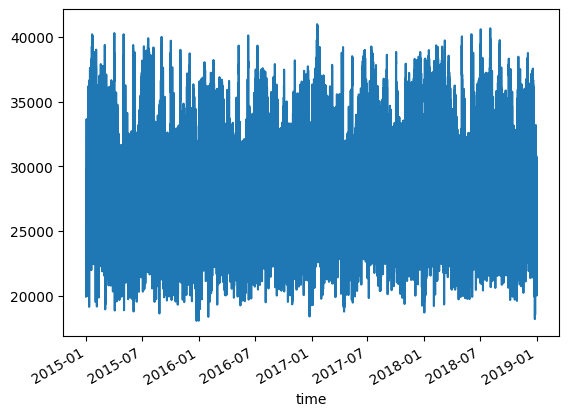

In [11]:
dataset["total load actual"].plot()

In [12]:
dataset_2 = dataset.copy()

In [13]:
dataset_2["target_2"] = dataset_2["total load actual"]

In [14]:
dataset_2[:27]

,total load actual,price actual,target_2
time,,,
2015-01-01 00:00:00+01:00,25385.0,65.41,25385.0
2015-01-01 01:00:00+01:00,24382.0,64.92,24382.0
2015-01-01 02:00:00+01:00,22734.0,64.48,22734.0
2015-01-01 03:00:00+01:00,21286.0,59.32,21286.0
2015-01-01 04:00:00+01:00,20264.0,56.04,20264.0
2015-01-01 05:00:00+01:00,19905.0,53.63,19905.0
2015-01-01 06:00:00+01:00,20010.0,51.73,20010.0
2015-01-01 07:00:00+01:00,20377.0,51.43,20377.0
2015-01-01 08:00:00+01:00,20094.0,48.98,20094.0


In [15]:
dataset_3 = dataset_2.copy()
dataset_3["target_3"] = dataset_3["target_2"]
dataset_3.head()

,total load actual,price actual,target_2,target_3
time,,,,
2015-01-01 00:00:00+01:00,25385.0,65.41,25385.0,25385.0
2015-01-01 01:00:00+01:00,24382.0,64.92,24382.0,24382.0
2015-01-01 02:00:00+01:00,22734.0,64.48,22734.0,22734.0
2015-01-01 03:00:00+01:00,21286.0,59.32,21286.0,21286.0
2015-01-01 04:00:00+01:00,20264.0,56.04,20264.0,20264.0


In [16]:
def multivariate_trailing_window(data, num_targets, window_size, horizon):
    """
    Generate multivariate trailing windows for time series prediction.

    Parameters:
    - data: pandas DataFrame, input time series data with columns representing features and targets
    - window_size: int, size of the trailing window
    - horizon: int, number of steps to forecast into the future
    - num_targets: int, number of target variables

    Returns:
    - X: numpy array, input features (shape: [num_samples - window_size - horizon + 1, window_size, num_features])
    - y: numpy array, target values (shape: [num_samples - window_size - horizon + 1, horizon, num_targets])
    """

    num_samples = len(data)
    num_features = data.shape[1] - num_targets  # Subtract num_targets for target columns

    X, y = [], []

    for i in range(num_samples - window_size - horizon + 1):
        X.append(data.iloc[i:i + window_size, :-num_targets].values)
        y.append(data.iloc[i + window_size:i + window_size + horizon, -num_targets:].values.reshape(-1, num_targets))

    return np.array(X), np.array(y)

In [17]:
def multivariate_centered_window(data, num_targets, window_size, horizon):
    """
    Generate multivariate centered windows for time series prediction.

    Parameters:
    - data: pandas DataFrame, input time series data with columns representing features and targets
    - window_size: int, size of the centered window (even number)
    - horizon: int, number of steps to forecast into the future

    Returns:
    - X: numpy array, input features (shape: [num_samples - window_size + 1, window_size, num_features])
    - y: numpy array, target values (shape: [num_samples - window_size + 1, horizon, num_targets])
    """

    num_samples = len(data)
    num_features = data.shape[1] - num_targets  # Subtract num_targets for target columns
    num_targets = data.shape[1] - num_features

    X, y = [], []

    # Ensure the window size is even
    if window_size % 2 != 0:
        raise ValueError("Window size must be an even number for a centered window.")

    half_window = window_size // 2

    for i in range(half_window, num_samples - half_window - horizon + 1):
        start_idx = i - half_window
        end_idx = i + half_window - 1  # Adjust the end index

        X.append(data.iloc[start_idx:end_idx + 1, :-num_targets].values)
        y.append(data.iloc[i:i + horizon, -num_targets:].values.reshape(-1, num_targets))

    return np.array(X), np.array(y)

In [18]:
test_X_2, test_y_2 = multivariate_trailing_window(dataset_3, 2, 24, 3)

In [19]:
test_X_2.shape, test_y_2.shape

((35038, 24, 2), (35038, 3, 2))

In [20]:
test_X_2[0]

array([[25385.  ,    65.41],
       [24382.  ,    64.92],
       [22734.  ,    64.48],
       [21286.  ,    59.32],
       [20264.  ,    56.04],
       [19905.  ,    53.63],
       [20010.  ,    51.73],
       [20377.  ,    51.43],
       [20094.  ,    48.98],
       [20637.  ,    54.2 ],
       [22250.  ,    58.94],
       [23547.  ,    59.86],
       [24133.  ,    60.12],
       [24713.  ,    62.05],
       [24672.  ,    62.06],
       [23528.  ,    59.76],
       [23118.  ,    61.18],
       [23606.  ,    64.74],
       [26447.  ,    74.26],
       [28020.  ,    74.24],
       [29014.  ,    75.64],
       [29571.  ,    73.92],
       [29031.  ,    70.53],
       [26798.  ,    64.13]])

In [21]:
test_y_2[0]

array([[27070., 27070.],
       [24935., 24935.],
       [23214., 23214.]])

In [22]:
test_X, test_y = multivariate_centered_window(dataset_2, 1, 24, 1)

In [23]:
test_X.shape, test_y.shape

((35040, 24, 2), (35040, 1, 1))

In [24]:
test_X[0]

array([[25385.  ,    65.41],
       [24382.  ,    64.92],
       [22734.  ,    64.48],
       [21286.  ,    59.32],
       [20264.  ,    56.04],
       [19905.  ,    53.63],
       [20010.  ,    51.73],
       [20377.  ,    51.43],
       [20094.  ,    48.98],
       [20637.  ,    54.2 ],
       [22250.  ,    58.94],
       [23547.  ,    59.86],
       [24133.  ,    60.12],
       [24713.  ,    62.05],
       [24672.  ,    62.06],
       [23528.  ,    59.76],
       [23118.  ,    61.18],
       [23606.  ,    64.74],
       [26447.  ,    74.26],
       [28020.  ,    74.24],
       [29014.  ,    75.64],
       [29571.  ,    73.92],
       [29031.  ,    70.53],
       [26798.  ,    64.13]])

In [25]:
test_y[0]

array([[24133.]])

In [27]:
X, y = multivariate_trailing_window(dataset_2, 1, WINDOWS, HORIZON)

In [28]:
X.shape, y.shape

((35040, 24, 2), (35040, 1, 1))

In [29]:
y = np.squeeze(y, axis=-1)

In [30]:
X[0], y[0]

(array([[25385.  ,    65.41],
        [24382.  ,    64.92],
        [22734.  ,    64.48],
        [21286.  ,    59.32],
        [20264.  ,    56.04],
        [19905.  ,    53.63],
        [20010.  ,    51.73],
        [20377.  ,    51.43],
        [20094.  ,    48.98],
        [20637.  ,    54.2 ],
        [22250.  ,    58.94],
        [23547.  ,    59.86],
        [24133.  ,    60.12],
        [24713.  ,    62.05],
        [24672.  ,    62.06],
        [23528.  ,    59.76],
        [23118.  ,    61.18],
        [23606.  ,    64.74],
        [26447.  ,    74.26],
        [28020.  ,    74.24],
        [29014.  ,    75.64],
        [29571.  ,    73.92],
        [29031.  ,    70.53],
        [26798.  ,    64.13]]),
 array([27070.]))

In [31]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_val, y_val = X[split_size:], y[split_size:]

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
train_num_samples, train_num_timesteps, train_num_features = X_train.shape
X_train = X_train.reshape((train_num_samples * train_num_timesteps, train_num_features))
scaler_X = MinMaxScaler().fit(X_train)

In [34]:
X_train_scaled = scaler_X.transform(X_train)
X_train_scaled = X_train_scaled.reshape((train_num_samples, train_num_timesteps, train_num_features))

In [35]:
val_num_samples, val_num_timesteps, val_num_features = X_val.shape
X_val = X_val.reshape((val_num_samples * val_num_timesteps, val_num_features))

In [36]:
X_val_scaled = scaler_X.transform(X_val)
X_val_scaled = X_val_scaled.reshape((val_num_samples, val_num_timesteps, val_num_features))

In [37]:
X_train_scaled.shape, X_val_scaled.shape

((28032, 24, 2), (7008, 24, 2))

In [38]:
scalar_y = MinMaxScaler().fit(y_train)

In [39]:
y_train_scaled = scalar_y.transform(y_train)

In [40]:
y_train_scaled[0]

array([0.39300949])

In [41]:
y_train_scaled.shape

(28032, 1)

In [42]:
y_val_scaled = scalar_y.transform(y_val)

In [43]:
y_val_scaled[0]

array([0.41229216])

In [44]:
def create_performant_features_targerts(features, targets, batch_size=32, pre=False, func=None, shuffle=False, shuffle_size=None):
    """
    Create performant dataset for escalating efficiency during training/evaluating a model.
    """
    features_tensor = tf.data.Dataset.from_tensor_slices(tf.cast(features, dtype=tf.float32))
    targets_tensor = tf.data.Dataset.from_tensor_slices(tf.cast(targets, dtype=tf.float32))
    dataset_tensor = tf.data.Dataset.zip((features_tensor, targets_tensor))
    if pre:
        dataset_tensor = dataset_tensor.map(map_func=func, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset_tensor = dataset_tensor.shuffle(shuffle_size)
    dataset_tensor = dataset_tensor.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset_tensor

In [45]:
train_dataset = create_performant_features_targerts(X_train_scaled, y_train_scaled)
val_dataset = create_performant_features_targerts(X_val_scaled, y_val_scaled)

In [46]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 24, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [47]:
from tensorflow.keras import layers

In [147]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(train_num_timesteps, train_num_features), dtype=tf.float32)
x = layers.Conv1D(64, 6, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.LSTM(72, activation="relu", return_sequences=True)(x)
x = layers.LSTM(48, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(HORIZON)(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

In [148]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 2)]           0         
                                                                 
 conv1d (Conv1D)             (None, 19, 64)            832       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 3, 72)             3945

In [48]:
import os
import random
import datetime

In [49]:
def tensorboard_cb(dirpath, model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join(dirpath, 
                                                       model_name, 
                                                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

def checkpoint_cb(dirpath, model_name, save_format=None, save_weights=False):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(dirpath, model_name + save_format), 
                                              save_best_only=True, 
                                              save_weights_only=save_weights,
                                              monitor="val_loss",
                                              verbose=1)

def early_stopping_cb(patience):
    return tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                            restore_best_weights=True, 
                                            patience=patience,
                                            verbose=1)

def reduce_lr_cb(patience, factor):
    return tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                patience=patience, 
                                                factor=factor, 
                                                min_lr=1e-7,
                                                verbose=1)

In [151]:
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4))

model_1_history = model_1.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=150,
                              callbacks=[tensorboard_cb("model_logs/energy/", model_1.name),
                                         checkpoint_cb("h5_models/energy/", model_1.name, save_format=".h5"),
                                         early_stopping_cb(patience=5),
                                         reduce_lr_cb(patience=3, factor=0.1)])

Epoch 1/150
876/876 [==============================] - ETA: 0s - loss: 0.1708
Epoch 1: val_loss improved from inf to 0.12544, saving model to h5_models/energy\model_1.h5
876/876 [==============================] - 32s 35ms/step - loss: 0.1708 - val_loss: 0.1254 - lr: 3.0000e-04
Epoch 2/150
876/876 [==============================] - ETA: 0s - loss: 0.1081
Epoch 2: val_loss improved from 0.12544 to 0.08466, saving model to h5_models/energy\model_1.h5
876/876 [==============================] - 32s 37ms/step - loss: 0.1081 - val_loss: 0.0847 - lr: 3.0000e-04
Epoch 3/150
876/876 [==============================] - ETA: 0s - loss: 0.0881
Epoch 3: val_loss improved from 0.08466 to 0.07541, saving model to h5_models/energy\model_1.h5
876/876 [==============================] - 26s 29ms/step - loss: 0.0881 - val_loss: 0.0754 - lr: 3.0000e-04
Epoch 4/150
875/876 [============================>.] - ETA: 0s - loss: 0.0804
Epoch 4: val_loss improved from 0.07541 to 0.06927, saving model to h5_models/en

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
def evaluate_ts_rg_model(actual_values, predicted_values):
    """
    Evaluate a time series/regression model for forecasting population.

    Parameters:
    - actual_values: 1D array or list of actual population values.
    - predicted_values: 1D array or list of predicted population values.

    Returns:
    - evaluation_results: Dictionary containing evaluation metrics.
    """
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(actual_values, predicted_values)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(actual_values, predicted_values)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Mean Absolute Percentage Error (MAPE)
    mask = actual_values != 0  # Avoid division by zero
    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)[mask]) * 100

    # R-squared (R2)
    r2 = r2_score(actual_values, predicted_values)

    evaluation_results = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

    return evaluation_results

In [52]:
def plot_ts_rg_preds_interval(y_true, y_preds, offset, figsize=(10, 7)):
    """
    Plot a graph with a defined offset to visualize the 95% confidence of the model's predictions versus actual.
    
    Parameters:
    - y_true: 1D array or list of actual values.
    - y_preds: 1D array or list of predicted values.
    - offset: The duration to visualize.
    """
    residuals = y_true - y_preds
    standard_errors = np.std(residuals)
    margin_of_errors = 1.96 * standard_errors
    upper = y_preds + margin_of_errors
    lower = y_preds - margin_of_errors

    plt.figure(figsize=figsize)
    plt.plot(y_true[offset:], label="Actual", color="green")
    plt.plot(y_preds[offset:], label="Preds", color="blue")
    plt.fill_between(range(len(y_true[offset:])), lower[offset:], upper[offset:], color="lightgrey", label="Preds Interval")
    plt.grid(True)
    plt.legend(fontsize=14)
    plt.xlabel("Duration")
    plt.ylabel("Targets")

In [152]:
model_1_loaded = tf.keras.models.load_model("h5_models/energy/model_1.h5")

In [153]:
model_1_preds = model_1_loaded.predict(val_dataset)
model_1_preds

array([[0.4079073 ],
       [0.32210338],
       [0.26808774],
       ...,
       [0.5566428 ],
       [0.47901422],
       [0.3515639 ]], dtype=float32)

In [154]:
y_val_scaled.shape

(7008, 1)

In [155]:
model_1_preds.shape

(7008, 1)

In [156]:
y_val_unscaled = tf.cast(tf.squeeze(scalar_y.inverse_transform(y_val_scaled)), dtype=tf.float32)
y_val_unscaled

<tf.Tensor: shape=(7008,), dtype=float32, numpy=array([27513., 25726., 24749., ..., 28071., 25801., 24455.], dtype=float32)>

In [157]:
model_1_preds_unscaled = tf.squeeze(scalar_y.inverse_transform(model_1_preds))
model_1_preds_unscaled

<tf.Tensor: shape=(7008,), dtype=float32, numpy=
array([27412.262, 25441.004, 24200.049, ..., 30829.312, 29045.871,
       26117.83 ], dtype=float32)>

In [175]:
model_1_results = evaluate_ts_rg_model(y_val_unscaled, model_1_preds_unscaled)
model_1_results

{'MAE': 988.64984,
 'MSE': 1836809.4,
 'RMSE': 1355.2894,
 'MAPE': 3.558509051799774,
 'R2': 0.910031934024084}

In [159]:
offset = np.abs(48-len(model_1_preds_unscaled))
offset

6960

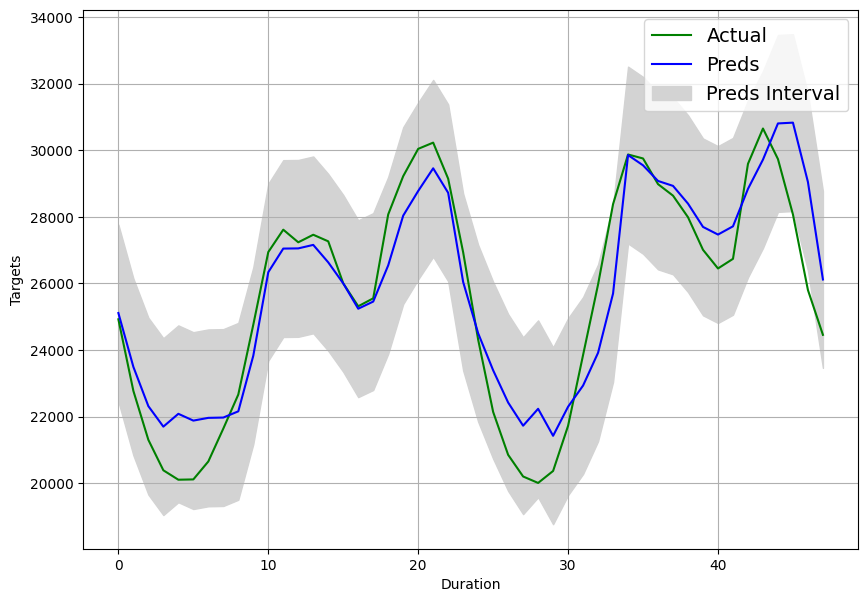

In [160]:
plot_ts_rg_preds_interval(y_val_unscaled, model_1_preds_unscaled, offset=offset)

In [161]:
model_1_preds_train = model_1_loaded.predict(train_dataset)
model_1_preds_train_unscaled = tf.squeeze(scalar_y.inverse_transform(model_1_preds_train))

In [162]:
y_train_unscaled = tf.cast(tf.squeeze(scalar_y.inverse_transform(y_train_scaled)), dtype=tf.float32)

In [173]:
model_1_results_train = evaluate_ts_rg_model(y_train_unscaled, model_1_preds_train_unscaled)

In [174]:
model_1_results_train

{'MAE': 962.48486,
 'MSE': 1788992.0,
 'RMSE': 1337.5321,
 'MAPE': 3.5460393875837326,
 'R2': 0.9150155743491506}

In [165]:
offset_train = np.abs(24-len(model_1_preds_train_unscaled))
offset_train

28008

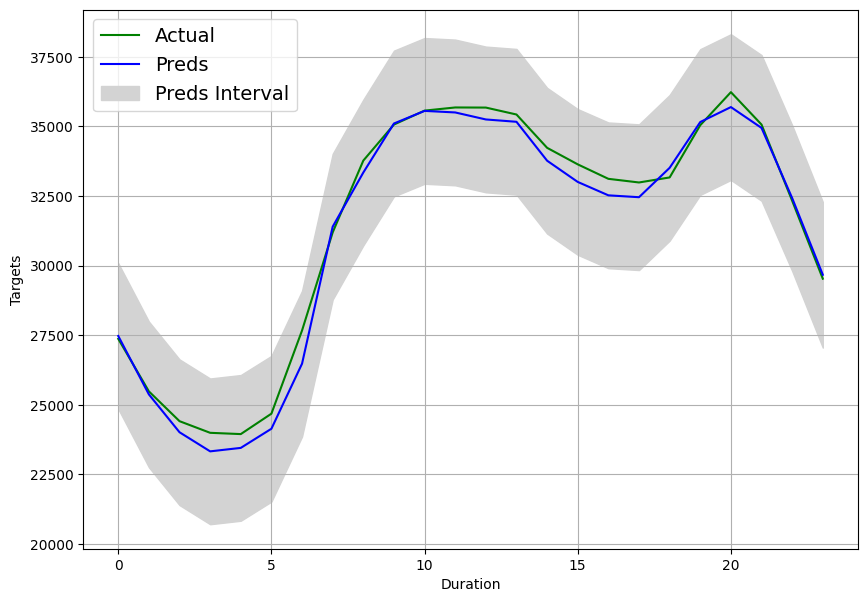

In [166]:
plot_ts_rg_preds_interval(y_train_unscaled, model_1_preds_train_unscaled, offset=offset_train)

In [176]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [177]:
%tensorboard --logdir model_logs/energy --port 8081

<Axes: >

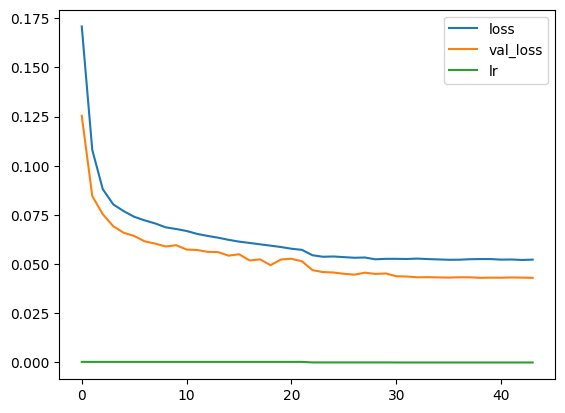

In [178]:
pd.DataFrame(model_1_history.history).plot()

In [377]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(train_num_timesteps, train_num_features), dtype=tf.float32)
x = layers.Conv1D(64, 6, activation="relu")(inputs)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.LSTM(72, activation="relu", return_sequences=True)(x)
x = layers.LSTM(48, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(HORIZON)(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4))

model_2_history = model_2.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=150,
                              callbacks=[tensorboard_cb("model_logs/energy/", model_2.name),
                                         checkpoint_cb("h5_models/energy/", model_2.name, save_format=".h5"),
                                         early_stopping_cb(patience=5),
                                         reduce_lr_cb(patience=3, factor=0.1)])

Epoch 1/150
876/876 [==============================] - ETA: 0s - loss: 0.1245
Epoch 1: val_loss improved from inf to 0.07892, saving model to h5_models/energy\model_2.h5
876/876 [==============================] - 107s 117ms/step - loss: 0.1245 - val_loss: 0.0789 - lr: 3.0000e-04
Epoch 2/150
876/876 [==============================] - ETA: 0s - loss: 0.0668
Epoch 2: val_loss improved from 0.07892 to 0.04541, saving model to h5_models/energy\model_2.h5
876/876 [==============================] - 108s 124ms/step - loss: 0.0668 - val_loss: 0.0454 - lr: 3.0000e-04
Epoch 3/150
876/876 [==============================] - ETA: 0s - loss: 0.0565
Epoch 3: val_loss improved from 0.04541 to 0.04357, saving model to h5_models/energy\model_2.h5
876/876 [==============================] - 109s 124ms/step - loss: 0.0565 - val_loss: 0.0436 - lr: 3.0000e-04
Epoch 4/150
876/876 [==============================] - ETA: 0s - loss: 0.0506
Epoch 4: val_loss improved from 0.04357 to 0.03222, saving model to h5_mod

In [379]:
model_2_preds = model_2.predict(val_dataset)
model_2_results = evaluate_ts_rg_model(y_val_unscaled, tf.squeeze(scalar_y.inverse_transform(model_2_preds)))
model_2_results

{'MAE': 371.46704,
 'MSE': 321584.94,
 'RMSE': 567.0846,
 'MAPE': 1.3079303316771984,
 'R2': 0.9842485669935609}

In [383]:
model_2.evaluate(train_dataset), model_2.evaluate(val_dataset)

219/219 [==============================] - 3s 14ms/step - loss: 0.0162


(0.016956329345703125, 0.016169017180800438)

In [386]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 2)]           0         
                                                                 
 conv1d (Conv1D)             (None, 19, 64)            832       
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            12352     
                                                                 
 lstm (LSTM)                 (None, 17, 72)            39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0   

In [381]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(train_num_timesteps, train_num_features), dtype=tf.float32)
x = layers.Conv1D(16, 3, activation="relu", padding="causal")(inputs)
x = layers.Bidirectional(layers.LSTM(16, activation="relu"))(x)
x = layers.Dense(16)(x)
outputs = layers.Dense(HORIZON)(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model_3_history = model_3.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=150,
                              callbacks=[tensorboard_cb("model_logs/energy/", model_3.name),
                                         checkpoint_cb("h5_models/energy/", model_3.name, save_format=".h5"),
                                         early_stopping_cb(patience=5),
                                         reduce_lr_cb(patience=3, factor=0.1)])

Epoch 1/150
876/876 [==============================] - ETA: 0s - loss: 0.0701
Epoch 1: val_loss improved from inf to 0.04712, saving model to h5_models/energy\model_3.h5
876/876 [==============================] - 133s 149ms/step - loss: 0.0701 - val_loss: 0.0471 - lr: 0.0010
Epoch 2/150
876/876 [==============================] - ETA: 0s - loss: 0.0356
Epoch 2: val_loss improved from 0.04712 to 0.03962, saving model to h5_models/energy\model_3.h5
876/876 [==============================] - 139s 159ms/step - loss: 0.0356 - val_loss: 0.0396 - lr: 0.0010
Epoch 3/150
876/876 [==============================] - ETA: 0s - loss: 0.0285
Epoch 3: val_loss improved from 0.03962 to 0.02703, saving model to h5_models/energy\model_3.h5
876/876 [==============================] - 147s 168ms/step - loss: 0.0285 - val_loss: 0.0270 - lr: 0.0010
Epoch 4/150
876/876 [==============================] - ETA: 0s - loss: 0.0253
Epoch 4: val_loss did not improve from 0.02703
876/876 [==============================

KeyboardInterrupt: 

In [382]:
model_3_loaded  = tf.keras.models.load_model("h5_models/energy/model_3.h5")
model_3_preds = model_3_loaded.predict(val_dataset)
model_3_results = evaluate_ts_rg_model(y_val_unscaled, tf.squeeze(scalar_y.inverse_transform(model_3_preds)))
model_3_results

{'MAE': 371.90076,
 'MSE': 345130.94,
 'RMSE': 587.47845,
 'MAPE': 1.2999387457966805,
 'R2': 0.983095271639994}

In [384]:
model_3_loaded.evaluate(train_dataset), model_3_loaded.evaluate(val_dataset)

219/219 [==============================] - 4s 17ms/step - loss: 0.0162


(0.016639500856399536, 0.016187895089387894)

In [387]:
model_3_loaded.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 2)]           0         
                                                                 
 conv1d (Conv1D)             (None, 24, 16)            112       
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,881
Trainable params: 4,881
Non-trainable params: 0
_________________________________________________________

In [53]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(train_num_timesteps, train_num_features), dtype=tf.float32)
x = layers.LSTM(50, activation="relu", return_sequences=True)(inputs)
x = layers.LSTM(25, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(HORIZON)(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3))

model_4_history = model_4.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=150,
                              callbacks=[tensorboard_cb("model_logs/energy/", model_4.name),
                                         checkpoint_cb("h5_models/energy/", model_4.name, save_format=".h5"),
                                         early_stopping_cb(patience=5),
                                         reduce_lr_cb(patience=3, factor=0.1)])

Epoch 1/150
876/876 [==============================] - ETA: 0s - loss: 0.0864
Epoch 1: val_loss improved from inf to 0.03055, saving model to h5_models/energy\model_4.h5
876/876 [==============================] - 135s 151ms/step - loss: 0.0864 - val_loss: 0.0306 - lr: 0.0050
Epoch 2/150
876/876 [==============================] - ETA: 0s - loss: 0.0501
Epoch 2: val_loss did not improve from 0.03055
876/876 [==============================] - 139s 158ms/step - loss: 0.0501 - val_loss: 0.0358 - lr: 0.0050
Epoch 3/150
876/876 [==============================] - ETA: 0s - loss: 0.0468
Epoch 3: val_loss did not improve from 0.03055
876/876 [==============================] - 159s 182ms/step - loss: 0.0468 - val_loss: 0.0410 - lr: 0.0050
Epoch 4/150
876/876 [==============================] - ETA: 0s - loss: 0.0449
Epoch 4: val_loss improved from 0.03055 to 0.02906, saving model to h5_models/energy\model_4.h5
876/876 [==============================] - 141s 162ms/step - loss: 0.0449 - val_loss: 0.

KeyboardInterrupt: 

In [54]:
model_4_loaded = tf.keras.models.load_model("h5_models/energy/model_4.h5")
model_4_preds = model_4_loaded.predict(val_dataset)
model_4_results = evaluate_ts_rg_model(y_val, scalar_y.inverse_transform(model_4_preds))
model_4_results

{'MAE': 505.5469549867116,
 'MSE': 480774.49751305854,
 'RMSE': 693.3790431741203,
 'MAPE': 1.86847290045257,
 'R2': 0.9764513650164208}

In [204]:
testing = []
array_1 = [[["1a", "1b"],
            ["2a", "2b"],
            ["3a", "3b"]]]

array_2 = [[["4a", "4b"],
            ["5a", "5b"],
            ["6a", "6b"]]]

testing.append(array_1)
testing.append(array_2)

In [205]:
testing = np.array(testing)

In [206]:
testing.shape

(2, 1, 3, 2)

In [208]:
np.squeeze(testing).shape

(2, 3, 2)

In [229]:
np.squeeze(testing)

array([[['1a', '1b'],
        ['2a', '2b'],
        ['3a', '3b']],

       [['4a', '4b'],
        ['5a', '5b'],
        ['6a', '6b']]], dtype='<U2')

In [224]:
series = pd.Series(["1a", "1b", "2a", "2b", "3a", "3b"])

# Convert the Series to a NumPy array and reshape to (1, 3, 2)
numpy_array = np.array(series).reshape(1, 3, 2)

print(numpy_array.shape)

(1, 3, 2)


In [225]:
testing_2 = []
testing_2.append(numpy_array)

In [226]:
testing_2 = np.squeeze(np.array(testing_2), axis=0)

In [227]:
testing_2.shape

(1, 3, 2)

In [228]:
testing_2

array([[['1a', '1b'],
        ['2a', '2b'],
        ['3a', '3b']]], dtype=object)

In [231]:
array_3 = np.array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
 [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
 [ 3,  4,  5,  6,  7,  8 , 9, 10, 11, 12, 13, 14],
 [ 4,  5,  6,  7,  8 , 9 ,10, 11, 12, 13, 14, 15],
 [ 5,  6,  7,  8 , 9 ,10, 11, 12, 13, 14, 15, 16],
 [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
 [ 7,  8,  9, 10 ,11, 12 ,13 ,14, 15, 16, 17, 18],
 [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [232]:
array_3.shape

(8, 12)

In [236]:
np.expand_dims(array_3, axis=-1), np.expand_dims(array_3, axis=-1).shape

(array([[[ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12]],
 
        [[ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13]],
 
        [[ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13],
         [14]],
 
        [[ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13],
         [14],
         [15]],
 
        [[ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13],
         [14],
         [15],
         [16]],
 
        [[ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [